In [1]:
import tensorflow as td

In [2]:
import matplotlib as plt

In [3]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 71s 0us/step


In [4]:
print('x_train shape:', x_train.shape)

x_train shape: (50000, 32, 32, 3)


In [5]:
print('y_train shape:', y_train.shape)

y_train shape: (50000, 1)


In [6]:
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

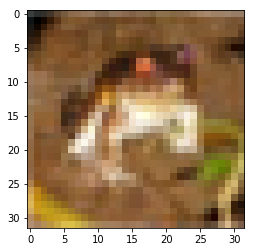

In [8]:
img = plt.imshow(x_train[0])

In [9]:
print('The label is:', y_train[0])

The label is: [6]


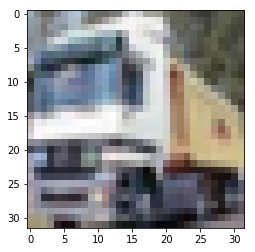

In [10]:
img = plt.imshow(x_train[1])

In [11]:
import keras
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

In [12]:
print('The one hot label is:', y_train_one_hot[1])

The one hot label is: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [13]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

In [14]:
x_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [16]:
model = Sequential()

In [17]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)))

In [18]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

In [19]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [20]:
model.add(Dropout(0.25))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [21]:
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [22]:
model.add(Flatten())

In [23]:
model.add(Dense(512, activation='relu'))

In [24]:
model.add(Dropout(0.5))

In [25]:
model.add(Dense(10, activation='softmax'))

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
__________

In [27]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [28]:
hist = model.fit(x_train, y_train_one_hot, 
           batch_size=32, epochs=20, 
           validation_split=0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 145s 4ms/step - loss: 1.5682 - acc: 0.4226 - val_loss: 1.2350 - val_acc: 0.5471
Epoch 2/20
40000/40000 [==============================] - 144s 4ms/step - loss: 1.1630 - acc: 0.5841 - val_loss: 0.9848 - val_acc: 0.6521
Epoch 3/20
40000/40000 [==============================] - 136s 3ms/step - loss: 1.0105 - acc: 0.6396 - val_loss: 0.8664 - val_acc: 0.6987
Epoch 4/20
40000/40000 [==============================] - 133s 3ms/step - loss: 0.9062 - acc: 0.6801 - val_loss: 0.8236 - val_acc: 0.7101
Epoch 5/20
40000/40000 [==============================] - 133s 3ms/step - loss: 0.8368 - acc: 0.7040 - val_loss: 0.7692 - val_acc: 0.7267
Epoch 6/20
40000/40000 [==============================] - 133s 3ms/step - loss: 0.7768 - acc: 0.7257 - val_loss: 0.7333 - val_acc: 0.7406
Epoch 7/20
40000/40000 [====

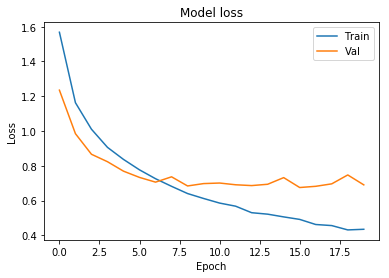

In [29]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

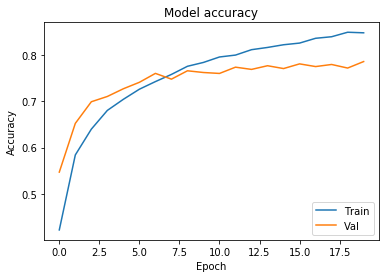

In [30]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [31]:
model.evaluate(x_test, y_test_one_hot)[1]

10000/10000 [==============================] - 5s 540us/step


0.7735

In [33]:
model.save('/home/soetcse/Pictures/my_cifar10_model.h5')

In [2]:
from keras.models import load_model
model = load_model('/home/soetcse/Pictures/my_cifar10_model.h5')

Using TensorFlow backend.







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [5]:
my_image = plt.imread("/home/soetcse/Pictures/cat.jpg")

In [6]:
from skimage.transform import resize
my_image_resized = resize(my_image, (32,32,3))

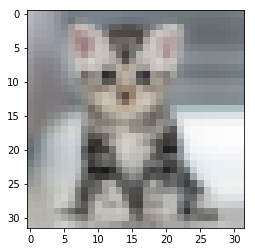

In [7]:
img = plt.imshow(my_image_resized)

In [8]:
import numpy as np
probabilities = model.predict(np.array( [my_image_resized,] ))

In [9]:
probabilities

array([[9.9524077e-05, 7.2769208e-09, 4.8859674e-04, 7.7412963e-01,
        3.1551071e-02, 1.8826103e-01, 2.5445552e-04, 5.2153403e-03,
        9.5214645e-09, 4.9292993e-07]], dtype=float32)

In [10]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0,:])
print("Most likely class:", number_to_class[index[9]], "-- Probability:", probabilities[0,index[9]])
print("Second most likely class:", number_to_class[index[8]], "-- Probability:", probabilities[0,index[8]])
print("Third most likely class:", number_to_class[index[7]], "-- Probability:", probabilities[0,index[7]])
print("Fourth most likely class:", number_to_class[index[6]], "-- Probability:", probabilities[0,index[6]])
print("Fifth most likely class:", number_to_class[index[5]], "-- Probability:", probabilities[0,index[5]])

Most likely class: cat -- Probability: 0.7741296
Second most likely class: dog -- Probability: 0.18826103
Third most likely class: deer -- Probability: 0.03155107
Fourth most likely class: horse -- Probability: 0.0052153403
Fifth most likely class: bird -- Probability: 0.00048859674
